In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #导入绘图操作用到的库
import random
import seaborn as sns

In [75]:
matrix = pd.read_csv("matrix.csv")
matrix = matrix.drop('Unnamed: 0',axis= 1)

In [76]:
#PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=3) 
pca = pca.fit(matrix)  # 拟合模型
matrix_ld = pd.DataFrame(pca.transform(matrix))  # 获取降维后的新矩阵 #low dimensions

In [77]:
#获取评论对应的平台编码
#读取两张csv表，并进行合并处理
df1 = pd.DataFrame(pd.read_csv('./first sheet v2.csv'))
df2 = pd.DataFrame(pd.read_csv('./second sheet v2.csv'))
df_total = pd.concat([df1,df2],ignore_index=True)
label = pd.DataFrame(df_total)
subtotal = label.groupby(['source']).count()
print(subtotal)
#平台来源编码
label.loc[label['source']=="微博",['source']] = 0 
label.loc[label['source']=="知乎问答",['source']] = 1
label.loc[label['source']=="简书文章",['source']] = 2 
label.loc[label['source']=="豆瓣日记",['source']] = 3 

def getSource():
    label_targets = label['source'] #label_targets用来表示平台来源
    label_targets = pd.DataFrame(label_targets)
    return pd.DataFrame(label_targets)
# 加入source的编码
matrix_visualization = pd.concat([matrix_ld,getSource()],axis=1,ignore_index=False)

        Unnamed: 0  link  title_link  title_link-href  topics  author  \
source                                                                  
微博               0     0           0                0       0   51442   
知乎问答             0  7019        7019             7019    7019    7019   
简书文章             0  6474        6474             6474       0    6474   
豆瓣日记             0  2313        2313             2313       0    2313   

        author_info  content  support   time  
source                                        
微博                0    51442        0  51442  
知乎问答           4719     7019        0   7019  
简书文章              0     6474     6474   6474  
豆瓣日记              0     2313      505   2313  


In [78]:
visualization = matrix_visualization

In [79]:
visualization

,0,1,2,source
0,-0.232634,-0.163858,-0.131121,1
1,-0.205673,-0.072416,-0.054499,1
2,-0.029674,-0.249420,-0.097997,1
3,-0.167914,0.103233,-0.136903,1
4,0.201602,-0.077706,-0.050459,1
...,...,...,...,...
67243,-0.082657,-0.299392,-0.011597,2
67244,-0.197148,-0.243006,0.052024,2
67245,-0.118212,-0.349689,-0.058266,2
67246,-0.215265,-0.320122,-0.119446,2


In [80]:
embedding_project = pd.concat([matrix,getSource()],axis=1,ignore_index=False)

In [88]:
embedding_project_columns =  embedding_project.columns.tolist()

In [89]:
embedding_project_GAI = embedding_project.copy()

In [86]:
for i in range(300):
    
    item = i
    embedding_project_GAI.insert(, "","huan", allow_duplicates=False)

In [92]:
embedding_project_GAI.insert(1, "","huan", allow_duplicates=False)


SyntaxError: positional argument follows keyword argument (<ipython-input-101-f3f4e13aaa7a>, line 1)

In [93]:
embedding_project_GAI

,0,,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,source
0,-0.021733,huan,0.041245,0.098273,-0.007892,-0.017470,0.095244,0.081689,-0.073449,-0.040258,...,0.100440,0.069950,-0.069965,0.080728,0.155897,0.005837,-0.013958,0.120523,0.006607,1
1,-0.000175,huan,0.131789,0.149112,0.119681,0.022725,0.036169,0.047115,-0.001744,-0.035074,...,0.036640,0.033312,-0.120256,0.088446,0.128674,-0.024103,-0.036476,0.126945,0.036214,1
2,0.038418,huan,0.097753,0.096255,0.105477,-0.051872,0.027738,0.075563,-0.102290,-0.027963,...,0.138150,0.026226,-0.110156,0.064839,0.115039,0.013632,0.002762,0.174287,0.006749,1
3,-0.005831,huan,0.070570,0.067746,0.147782,0.017913,0.082260,0.065184,0.044689,-0.026035,...,0.072401,0.016023,-0.114097,0.062274,0.113567,-0.022097,-0.051111,0.082897,-0.027853,1
4,0.017465,huan,0.111239,0.084476,0.132076,0.071431,0.084068,0.045622,-0.005434,0.016166,...,0.076375,-0.013892,-0.079806,0.024927,0.132604,-0.033519,-0.016568,0.101478,0.053374,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67243,0.047960,huan,0.024119,0.036582,0.014491,0.002226,0.050407,0.003114,-0.095708,0.031006,...,0.075831,0.111369,-0.082920,0.068918,0.045939,0.003448,0.003458,0.074132,0.029544,2
67244,-0.026164,huan,0.090944,0.131488,0.091751,0.022985,0.037353,0.079122,0.000402,0.030356,...,0.020149,0.022684,-0.188609,0.013300,0.065380,0.010955,-0.016751,0.095973,-0.019357,2
67245,0.028447,huan,0.093469,0.111459,0.067837,0.007214,0.033030,0.069982,-0.006457,-0.014103,...,0.079378,-0.041917,-0.073140,0.062451,0.126112,0.040647,0.000568,0.032379,0.049984,2
67246,-0.063390,huan,0.043630,0.015695,0.006271,-0.040396,0.059915,0.011118,-0.038842,-0.027899,...,0.077227,0.006230,-0.109151,0.107143,0.156515,-0.019746,0.046398,0.086576,-0.032903,2


In [60]:
embedding_project.to_csv('embedding_project')


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,source
0,-0.021733,0.041245,0.098273,-0.007892,-0.017470,0.095244,0.081689,-0.073449,-0.040258,-0.026621,...,0.100440,0.069950,-0.069965,0.080728,0.155897,0.005837,-0.013958,0.120523,0.006607,1
1,-0.000175,0.131789,0.149112,0.119681,0.022725,0.036169,0.047115,-0.001744,-0.035074,-0.032323,...,0.036640,0.033312,-0.120256,0.088446,0.128674,-0.024103,-0.036476,0.126945,0.036214,1
2,0.038418,0.097753,0.096255,0.105477,-0.051872,0.027738,0.075563,-0.102290,-0.027963,-0.049348,...,0.138150,0.026226,-0.110156,0.064839,0.115039,0.013632,0.002762,0.174287,0.006749,1
3,-0.005831,0.070570,0.067746,0.147782,0.017913,0.082260,0.065184,0.044689,-0.026035,-0.020321,...,0.072401,0.016023,-0.114097,0.062274,0.113567,-0.022097,-0.051111,0.082897,-0.027853,1
4,0.017465,0.111239,0.084476,0.132076,0.071431,0.084068,0.045622,-0.005434,0.016166,0.021234,...,0.076375,-0.013892,-0.079806,0.024927,0.132604,-0.033519,-0.016568,0.101478,0.053374,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67243,0.047960,0.024119,0.036582,0.014491,0.002226,0.050407,0.003114,-0.095708,0.031006,-0.023060,...,0.075831,0.111369,-0.082920,0.068918,0.045939,0.003448,0.003458,0.074132,0.029544,2
67244,-0.026164,0.090944,0.131488,0.091751,0.022985,0.037353,0.079122,0.000402,0.030356,-0.025804,...,0.020149,0.022684,-0.188609,0.013300,0.065380,0.010955,-0.016751,0.095973,-0.019357,2
67245,0.028447,0.093469,0.111459,0.067837,0.007214,0.033030,0.069982,-0.006457,-0.014103,0.053064,...,0.079378,-0.041917,-0.073140,0.062451,0.126112,0.040647,0.000568,0.032379,0.049984,2
67246,-0.063390,0.043630,0.015695,0.006271,-0.040396,0.059915,0.011118,-0.038842,-0.027899,0.060759,...,0.077227,0.006230,-0.109151,0.107143,0.156515,-0.019746,0.046398,0.086576,-0.032903,2


In [34]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #导入绘图操作用到的库
import random
import seaborn as sns

In [35]:
''''
matrix_visualization = pd.DataFrame()
matrix_visualization['PCA1'] = visualization['0']
matrix_visualization['PCA2'] = visualization['1']
matrix_visualization['source'] = visualization['source']

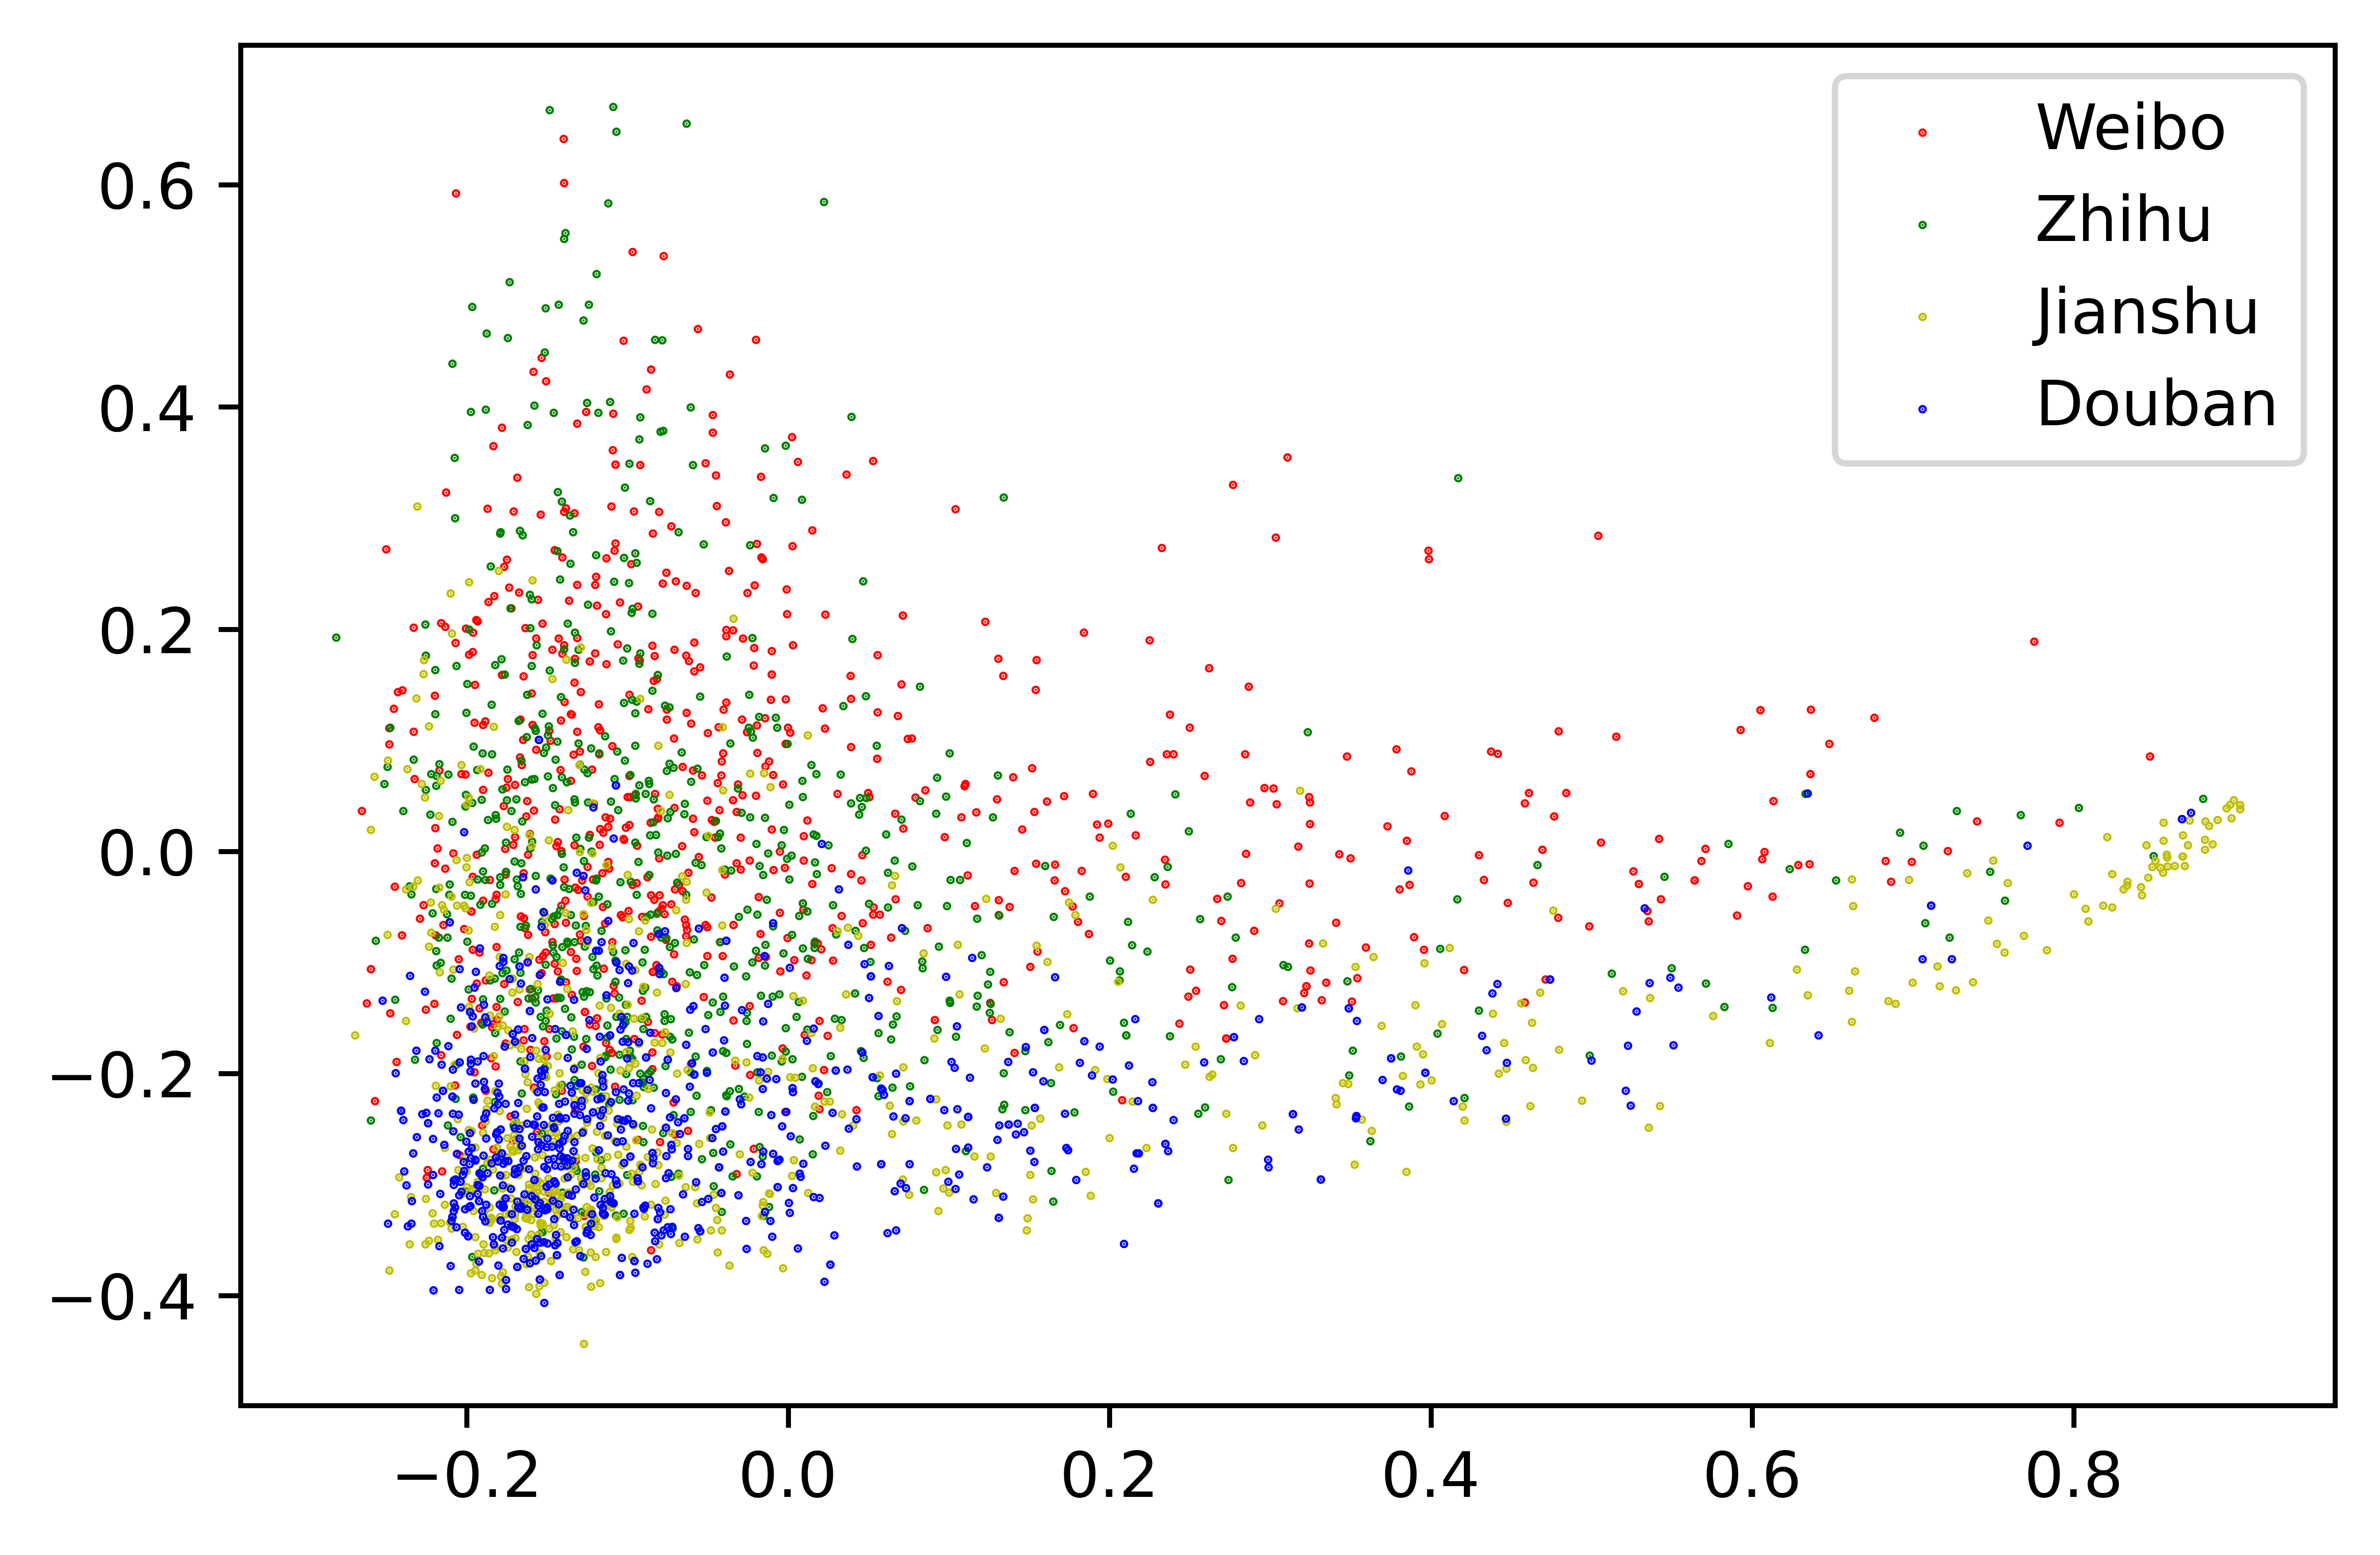

In [6]:
'''
import numpy as np
import matplotlib.pyplot as plt  #导入绘图操作用到的库
import random

#读取数据得到一个字典类型数据，需要根据键名 ’data‘ 取出对应的值。
data  = matrix_visualization
fig = plt.figure(dpi=1000)  # 创建画布
ax = fig.add_subplot(111)


idx_0 = data[data['source'] == 0].index.to_list()  # 找出标签为0的样本行数
ns_0 = round(len(idx_0)/73)
samples_0=random.sample(idx_0,ns_0)#随机抽取1/10

idx_1 = data[data['source'] == 1].index.to_list()  # 找出标签为1的样本行数
ns_1 = round(len(idx_1)/10)
samples_1=random.sample(idx_1,ns_1)#随机抽取1/10

idx_2 = data[data['source'] == 2].index.to_list()  # 找出标签为2的样本行数
ns_2 = round(len(idx_2)/10)
samples_2=random.sample(idx_2,ns_2)#随机抽取1/10

idx_3 = data[data['source'] == 3].index.to_list()  # 找出标签为3的样本行数
ns_3 = round(len(idx_3)/3)
samples_3=random.sample(idx_3,ns_3)#随机抽取1/10

#绘制散点图
p0 = ax.scatter(data.loc[samples_0,'PCA1'], data.loc[samples_0,'PCA2'], marker='.', color='r', s=0.5,label = 'Weibo')
p1 = ax.scatter(data.loc[samples_1,'PCA1'], data.loc[samples_1,'PCA2'], marker='.', color='g', s=0.5,label = 'Zhihu')
p2 = ax.scatter(data.loc[samples_2,'PCA1'], data.loc[samples_2,'PCA2'], marker='.', color='y', s=0.5,label = 'Jianshu')
p3 = ax.scatter(data.loc[samples_3,'PCA1'], data.loc[samples_3,'PCA2'], marker='.', color='b', s=0.5,label = 'Douban')

ax.legend() 
plt.show()   #显示散点图


In [55]:
matrix_visualization = pd.DataFrame()
matrix_visualization['PCA1'] = visualization[0]
matrix_visualization['PCA2'] = visualization[1]
matrix_visualization['PCA3'] = visualization[2]
matrix_visualization['source'] = visualization['source']

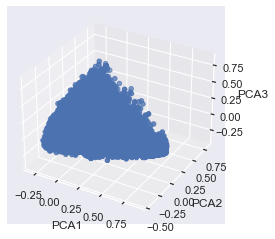

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = matrix_visualization
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = matrix_visualization['PCA1']
y = matrix_visualization['PCA2']
z = matrix_visualization['PCA3']

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

ax.scatter(x, y, z)

plt.show()